# Jaccard indexes of pairs of mental models

Each mental model can be considered as a set of edges. we can analyse the similarity among these models by computing the [jaccard coefficient](https://en.wikipedia.org/wiki/Jaccard_index) of each pair.

The jaccard index is defined as the ratio of Intersection over Union of two sets.

In [1]:
def jaccard_index(A, B):
    assert type(A) is set and type(B) is set
    return (len(A.intersection(B))
            / 
            float(len(A.union(B))))

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np

In [3]:
# load unweighted graphs from data dir
graphs = []
for i in range(1, 31):
    g = nx.readwrite.read_gpickle('data_v1/%s.gpickle' % i)
    g.name = i
    graphs.append(g)

In [22]:
# create sets of edge tuples for each network
edge_sets = {g.name: set() for g in graphs}

for g in graphs:
    for e in g.edges:
        edge_sets[g.name].add((e[0], e[1], g.get_edge_data(*e)['weight']))

In [23]:
edge_sets[1]

{('CO2 storage potential', 'GHG emissions', -1),
 ('CO2 storage potential', 'Public acceptance', 1),
 ('Capture potential', 'GHG emissions', -1),
 ('Cluster potential', 'Decarbonisation potential', 1),
 ('Decarbonisation potential', 'CO2 storage potential', 1),
 ('Decarbonisation potential', 'GHG emissions', -1),
 ('Decarbonisation willingness', 'Social welfare', 1),
 ('Economic development', 'Social welfare', 1),
 ('Emitters size', 'Capture potential', 1),
 ('Emitters size', 'Cluster potential', 1),
 ('Emitters size', 'Geological and engineering framework', 1),
 ('GHG emissions', 'Social welfare', 1),
 ('Geological and engineering framework', 'CO2 storage potential', 1),
 ('Geological and engineering framework', 'Incremental oil production', 1),
 ('Incremental oil production', 'Economic development', 1),
 ('Oil price', 'Economic development', 1),
 ('Public acceptance', 'Social welfare', 1),
 ('Regulatory framework', 'Relation with industry', 1),
 ('Regulatory framework', 'Trust in ins

In [24]:
# let's try our function!
assert jaccard_index(edge_sets[1], edge_sets[1]) == 1
jaccard_index(
    edge_sets[1],
    edge_sets[8])

0.14035087719298245

In [26]:
# now create a matrix compairing all pairs of edge sets
jin_matrix = [[jaccard_index(edge_sets[i],
                             edge_sets[j]) for i in edge_sets]
               for j in edge_sets]

# load it into a dataframe
jin_df = pd.DataFrame(jin_matrix,
                      edge_sets.keys(),
                      edge_sets.keys())
jin_df

1         2         3         4         5         6         7   \
1   1.000000  0.015873  0.049383  0.097222  0.027027  0.159091  0.117647   
2   0.015873  1.000000  0.035714  0.109589  0.147059  0.039216  0.072727   
3   0.049383  0.035714  1.000000  0.073684  0.031250  0.042254  0.000000   
4   0.097222  0.109589  0.073684  1.000000  0.134146  0.096774  0.072464   
5   0.027027  0.147059  0.031250  0.134146  1.000000  0.065574  0.163934   
6   0.159091  0.039216  0.042254  0.096774  0.065574  1.000000  0.069767   
7   0.117647  0.072727  0.000000  0.072464  0.163934  0.069767  1.000000   
8   0.140351  0.116667  0.113924  0.171429  0.082192  0.058824  0.071429   
9   0.055556  0.074534  0.060109  0.167702  0.069364  0.081081  0.024691   
10  0.087719  0.049180  0.049383  0.128571  0.055556  0.062500  0.075472   
11  0.064103  0.089744  0.039216  0.176471  0.031915  0.043478  0.054054   
12  0.135593  0.112903  0.058824  0.135135  0.080000  0.076923  0.050847   
13  0.120690  0.063492  0.047619  0.064935  0.012821  0.080000  0.052632   
14  0.071429  0.087719  0.050633  0.149254  0.057143  0.113636  0.018519   
15  0.032258  0.031250  0.035714  0.051948  0.083333  0.081633  0.035088   
16  0.054545  0.034483  0.051948  0.041667  0.000000  0.093023  0.000000   
17  0.129032  0.074627  0.081395  0.115385  0.090909  0.072727  0.015625   
18  0.096774  0.076923  0.022472  0.062500  0.154930  0.117647  0.285714   
19  0.160714  0.080645  0.023256  0.093333  0.097222  0.102041  0.176471   
20  0.120000  0.023810  0.049020  0.109890  0.088889  0.073529  0.112676   
21  0.119403  0.069444  0.088889  0.150000  0.072289  0.122807  0.029412   
22  0.114754  0.076923  0.058140  0.075949  0.108108  0.055556  0.016129   
23  0.061538  0.109375  0.057471  0.061728  0.077922  0.035714  0.049180   
24  0.127660  0.037736  0.013333  0.060606  0.046875  0.105263  0.066667   
25  0.044944  0.032609  0.045045  0.047619  0.009434  0.025000  0.047619   
26  0.041667  0.040000  0.028169  0.015152  0.049180  0.054054  0.022727   
27  0.029412  0.058824  0.056818  0.074074  0.000000  0.017241  0.000000   
28  0.072727  0.051724  0.037975  0.027027  0.013889  0.066667  0.018868   
29  0.079365  0.029412  0.070588  0.075949  0.000000  0.036364  0.032787   
30  0.016393  0.032258  0.089744  0.082192  0.027027  0.020000  0.000000   

          8         9         10  ...        21        22        23        24  \
1   0.140351  0.055556  0.087719  ...  0.119403  0.114754  0.061538  0.127660   
2   0.116667  0.074534  0.049180  ...  0.069444  0.076923  0.109375  0.037736   
3   0.113924  0.060109  0.049383  ...  0.088889  0.058140  0.057471  0.013333   
4   0.171429  0.167702  0.128571  ...  0.150000  0.075949  0.061728  0.060606   
5   0.082192  0.069364  0.055556  ...  0.072289  0.108108  0.077922  0.046875   
6   0.058824  0.081081  0.062500  ...  0.122807  0.055556  0.035714  0.105263   
7   0.071429  0.024691  0.075472  ...  0.029412  0.016129  0.049180  0.066667   
8   1.000000  0.074074  0.101695  ...  0.218750  0.126984  0.125000  0.076923   
9   0.074074  1.000000  0.030120  ...  0.088757  0.106250  0.047059  0.045161   
10  0.101695  0.030120  1.000000  ...  0.190476  0.096774  0.061538  0.104167   
11  0.178082  0.090909  0.092105  ...  0.043478  0.085366  0.139241  0.072464   
12  0.186441  0.079755  0.080645  ...  0.159420  0.140625  0.072464  0.094340   
13  0.079365  0.074074  0.083333  ...  0.114286  0.092308  0.074627  0.056604   
14  0.105263  0.119205  0.090909  ...  0.106061  0.100000  0.116667  0.062500   
15  0.000000  0.067901  0.049180  ...  0.026667  0.076923  0.044118  0.057692   
16  0.109091  0.037267  0.035714  ...  0.075758  0.103448  0.015625  0.020833   
17  0.177419  0.078313  0.129032  ...  0.077922  0.117647  0.069444  0.051724   
18  0.092308  0.041176  0.152542  ...  0.125000  0.072464  0.086957  0.053571   
19  0.172414  0.080745  0.101695  ...  0.114286  0.145161  0.058824  0.166667   
20  0.144737  0.084270  0.135135 

In [27]:
# trim redundant upper half
lower_triang = jin_df.where(np.tril(np.ones(jin_df.shape)).astype(bool))
lower_triang

1         2         3         4         5         6         7   \
1   1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2   0.015873  1.000000       NaN       NaN       NaN       NaN       NaN   
3   0.049383  0.035714  1.000000       NaN       NaN       NaN       NaN   
4   0.097222  0.109589  0.073684  1.000000       NaN       NaN       NaN   
5   0.027027  0.147059  0.031250  0.134146  1.000000       NaN       NaN   
6   0.159091  0.039216  0.042254  0.096774  0.065574  1.000000       NaN   
7   0.117647  0.072727  0.000000  0.072464  0.163934  0.069767  1.000000   
8   0.140351  0.116667  0.113924  0.171429  0.082192  0.058824  0.071429   
9   0.055556  0.074534  0.060109  0.167702  0.069364  0.081081  0.024691   
10  0.087719  0.049180  0.049383  0.128571  0.055556  0.062500  0.075472   
11  0.064103  0.089744  0.039216  0.176471  0.031915  0.043478  0.054054   
12  0.135593  0.112903  0.058824  0.135135  0.080000  0.076923  0.050847   
13  0.120690  0.063492  0.047619  0.064935  0.012821  0.080000  0.052632   
14  0.071429  0.087719  0.050633  0.149254  0.057143  0.113636  0.018519   
15  0.032258  0.031250  0.035714  0.051948  0.083333  0.081633  0.035088   
16  0.054545  0.034483  0.051948  0.041667  0.000000  0.093023  0.000000   
17  0.129032  0.074627  0.081395  0.115385  0.090909  0.072727  0.015625   
18  0.096774  0.076923  0.022472  0.062500  0.154930  0.117647  0.285714   
19  0.160714  0.080645  0.023256  0.093333  0.097222  0.102041  0.176471   
20  0.120000  0.023810  0.049020  0.109890  0.088889  0.073529  0.112676   
21  0.119403  0.069444  0.088889  0.150000  0.072289  0.122807  0.029412   
22  0.114754  0.076923  0.058140  0.075949  0.108108  0.055556  0.016129   
23  0.061538  0.109375  0.057471  0.061728  0.077922  0.035714  0.049180   
24  0.127660  0.037736  0.013333  0.060606  0.046875  0.105263  0.066667   
25  0.044944  0.032609  0.045045  0.047619  0.009434  0.025000  0.047619   
26  0.041667  0.040000  0.028169  0.015152  0.049180  0.054054  0.022727   
27  0.029412  0.058824  0.056818  0.074074  0.000000  0.017241  0.000000   
28  0.072727  0.051724  0.037975  0.027027  0.013889  0.066667  0.018868   
29  0.079365  0.029412  0.070588  0.075949  0.000000  0.036364  0.032787   
30  0.016393  0.032258  0.089744  0.082192  0.027027  0.020000  0.000000   

          8         9         10  ...        21        22        23        24  \
1        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
7        NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
8   1.000000       NaN       NaN  ...       NaN       NaN       NaN       NaN   
9   0.074074  1.000000       NaN  ...       NaN       NaN       NaN       NaN   
10  0.101695  0.030120  1.000000  ...       NaN       NaN       NaN       NaN   
11  0.178082  0.090909  0.092105  ...       NaN       NaN       NaN       NaN   
12  0.186441  0.079755  0.080645  ...       NaN       NaN       NaN       NaN   
13  0.079365  0.074074  0.083333  ...       NaN       NaN       NaN       NaN   
14  0.105263  0.119205  0.090909  ...       NaN       NaN       NaN       NaN   
15  0.000000  0.067901  0.049180  ...       NaN       NaN       NaN       NaN   
16  0.109091  0.037267  0.035714  ...       NaN       NaN       NaN       NaN   
17  0.177419  0.078313  0.129032  ...       NaN       NaN       NaN       NaN   
18  0.092308  0.041176  0.152542  ...       NaN       NaN       NaN       NaN   
19  0.172414  0.080745  0.101695  ...       NaN       NaN       NaN       NaN   
20  0.144737  0.084270  0.135135 

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.heatmap(lower_triang.replace(1.0, np.nan))  # remove ones to reduce range and improve visibility
#plt.tight_layout()
plt.show()

# Clustering

Use three different [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) methods to clusterize mental models.

I think **weighted** and **complete** are more informative, both show at least two discernible clusters. It would be interesting to know what category of stakeholders make up the suggested clusters.

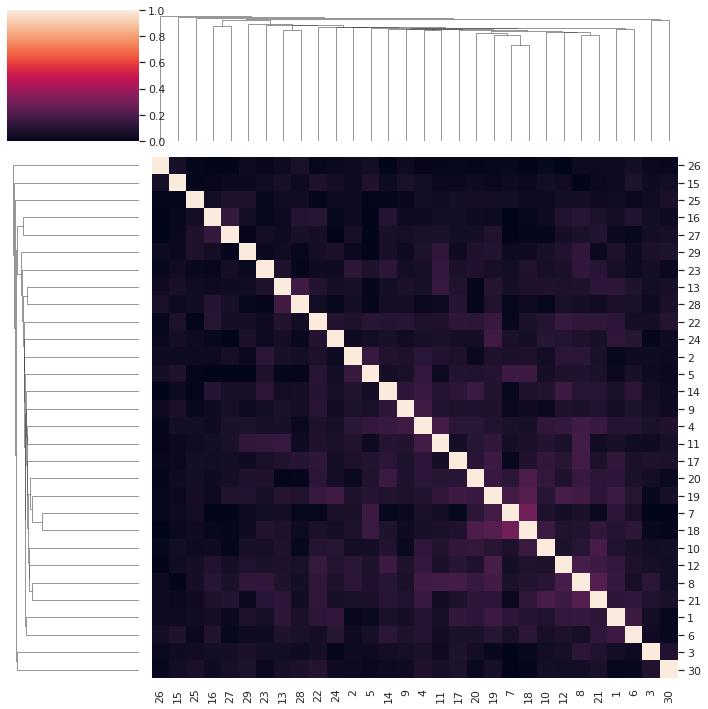

In [35]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='single'
              )
plt.tight_layout()

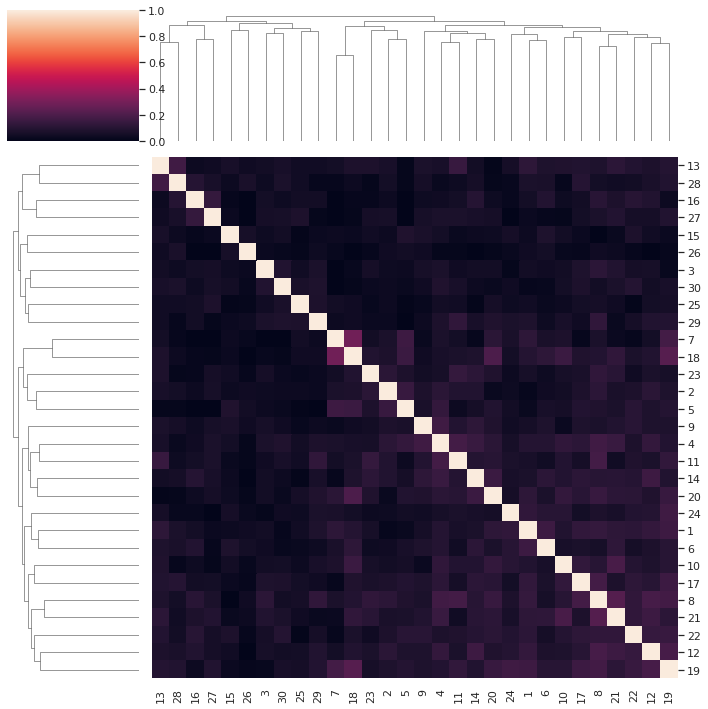

In [30]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='complete'
              )
plt.tight_layout()

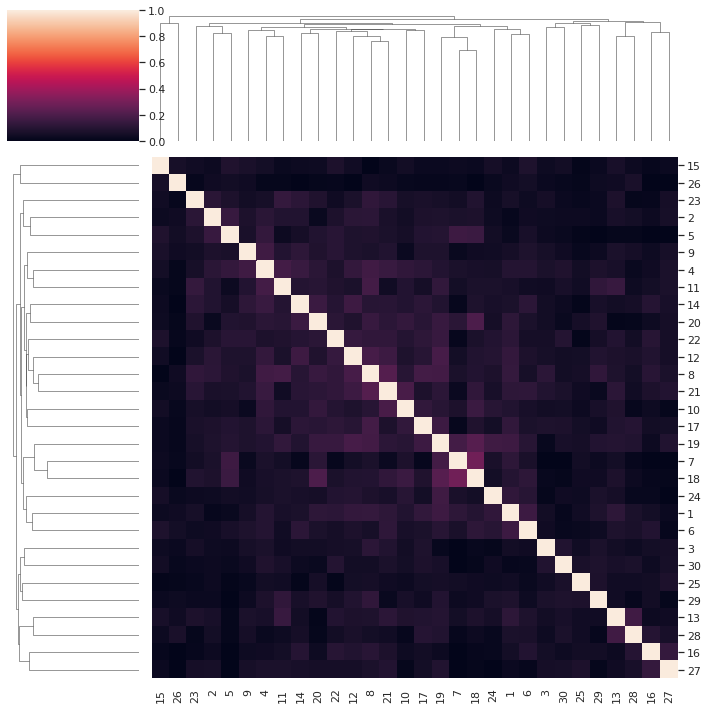

In [36]:
# log-scale it to improve visibility
sns.clustermap(jin_df, method='average')
plt.tight_layout()

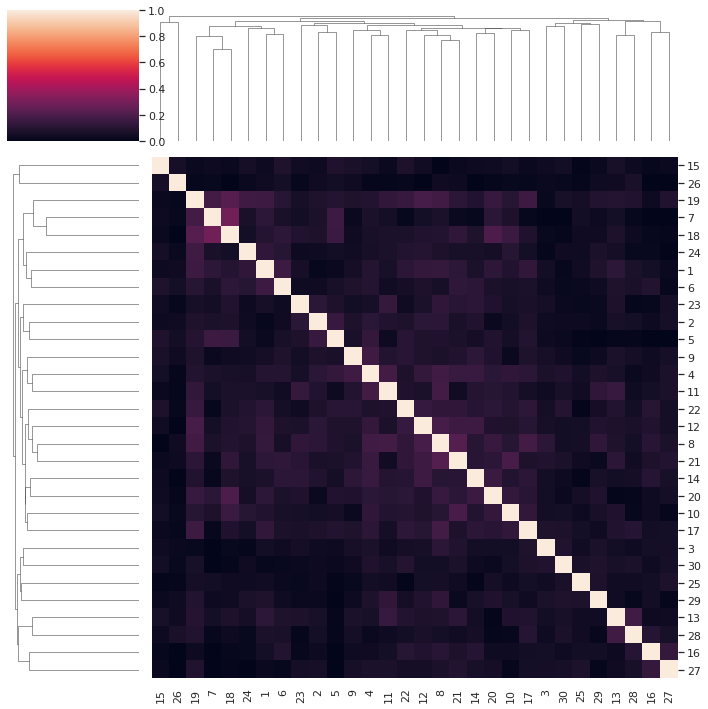

In [31]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='weighted'
              )
plt.tight_layout()

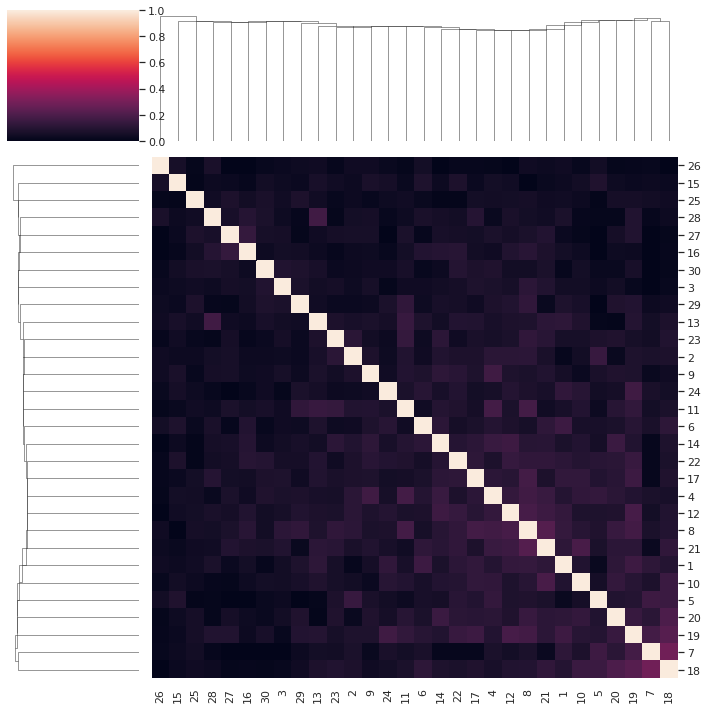

In [32]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='centroid'
              )
plt.tight_layout()

In [33]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='median'
              )
plt.tight_layout()

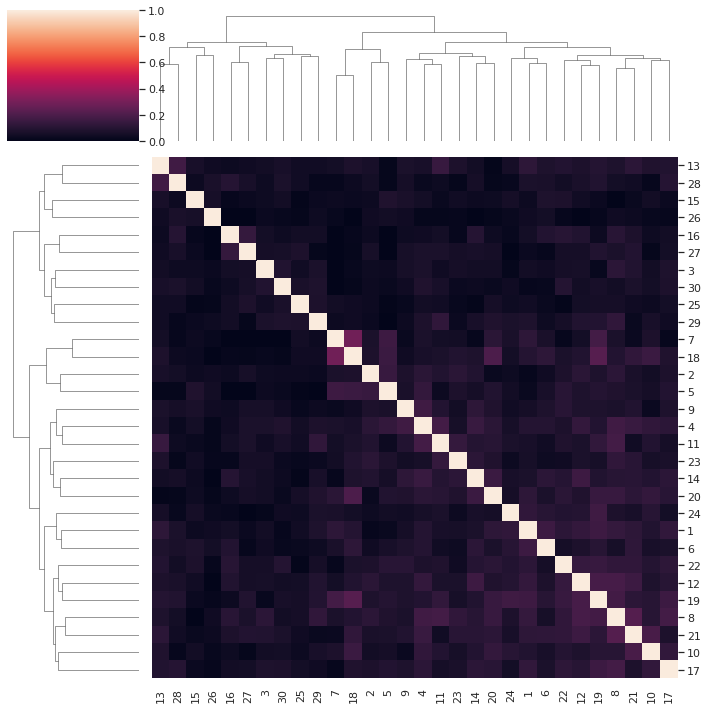

In [34]:
# log-scale it to improve visibility
sns.clustermap(jin_df,
               method='ward'
              )
plt.tight_layout()